In [1]:
load('tiktok.RData')
options(warn = -1)

In [2]:
ls()

[1] "activity"           "e_space"            "e_time"            
 [4] "emotion"            "loss"               "model_construction"
 [7] "model_evaluation"   "object"             "own"               
[10] "p_space"            "p_time"             "pe_space"          
[13] "pe_time"            "search"

In [3]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(quanteda)))
suppressWarnings(suppressMessages(library(topicmodels)))
suppressWarnings(suppressMessages(library(ldatuning)))
suppressWarnings(suppressMessages(library(stm)))
suppressWarnings(suppressMessages(library(wordcloud)))

### Appendix I

#### Figure I.1

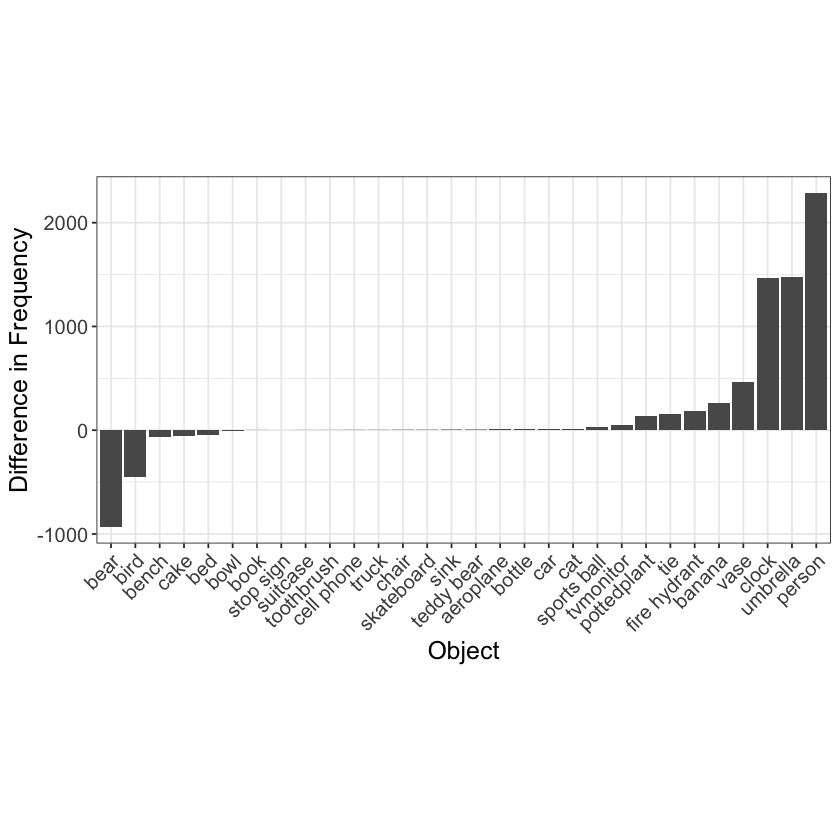

In [4]:
ggplot(object, 
       aes(reorder(object, count_diff), count_diff)) + geom_bar(stat = 'identity') + theme_bw() + 
theme(text = element_text(size=15)) +
xlab('Object') + ylab('Difference in Frequency') +
theme(aspect.ratio=2/4) + 
theme(axis.text.x=element_text(angle=45, hjust=1))

#### Figure I.2

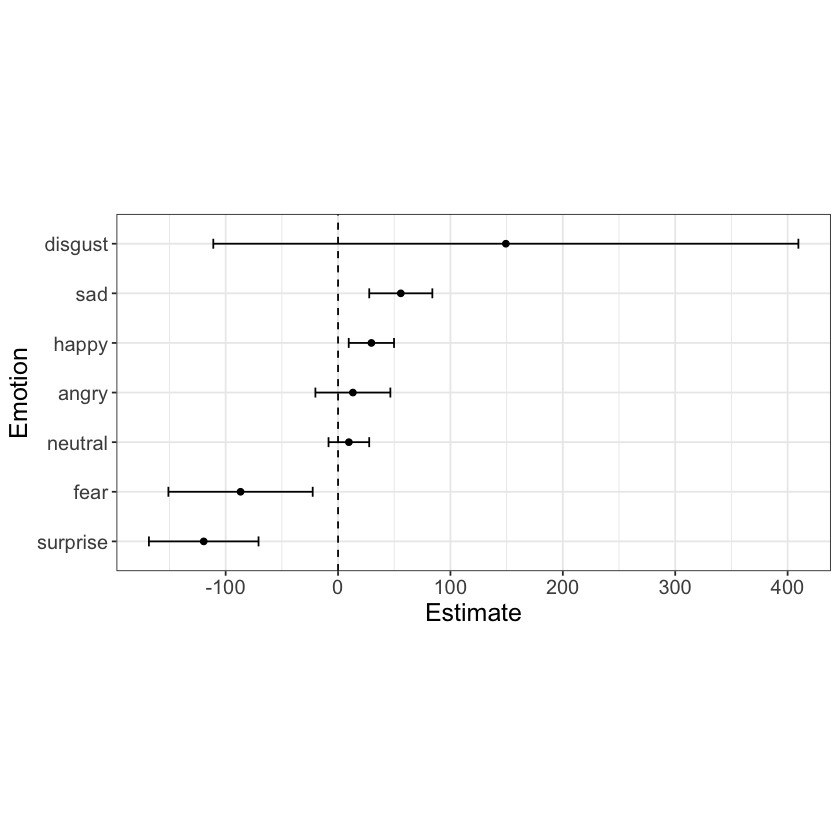

In [5]:
model = lm(enga_score ~ (angry + disgust + fear + happy + neutral + sad + surprise) + time, # time is the second in each video, split is a 15-second segment
          emotion)

e = data.frame(summary(model)$coef)
e$emotion = row.names(e)
e = e[-c(1,9),]

ggplot(e, aes(reorder(emotion, Estimate), Estimate)) +
geom_point() + 
geom_errorbar(aes(ymin = Estimate - 1.96*Std..Error, ymax = Estimate + 1.96*Std..Error), width = 0.2) +
theme_bw() + coord_flip() + 
xlab('Emotion') + 
theme(text = element_text(size=15)) + 
geom_hline(yintercept=0, linetype = 'dashed') +
scale_y_continuous(breaks=seq(-200, 500, 100)) +
theme(aspect.ratio=2/4)

#### Figure I.3

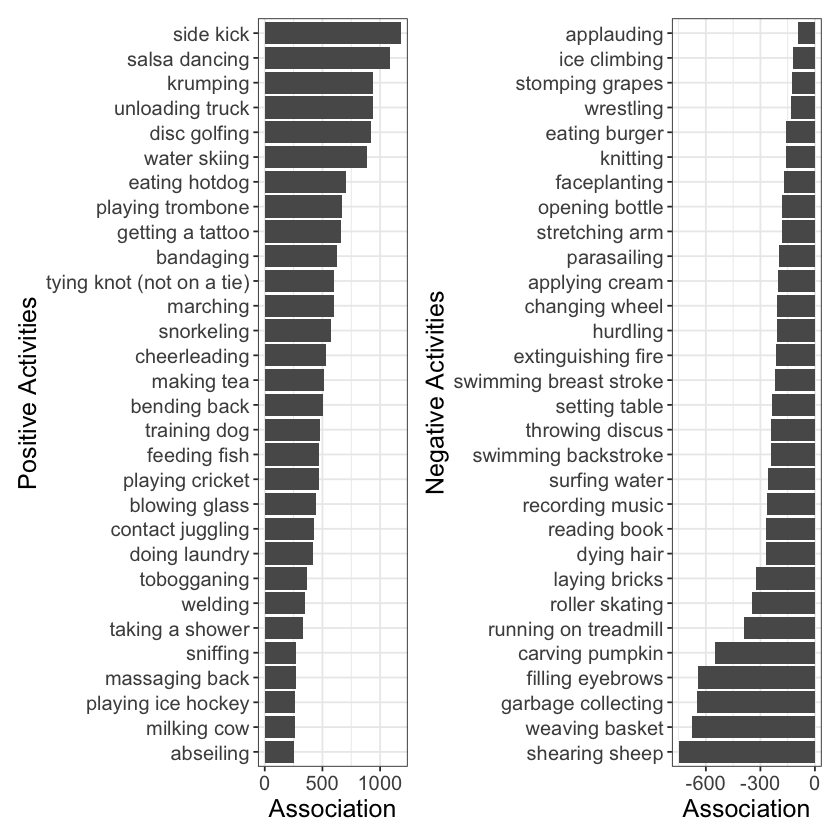

In [6]:
ggplot(filter(activity, Estimate > 0) %>% 
       arrange(Estimate) %>%
       top_n(30, Estimate), 
       aes(reorder(act, Estimate), Estimate)) + 
geom_bar(stat = 'identity') + theme_bw() + 
xlab('Positive Activities') + 
ylab('Association') +
theme(text = element_text(size=15)) + 
scale_y_continuous(breaks = seq(0, 1000, by = 500)) + 
coord_flip() +
# theme(axis.title.x = element_text(vjust=63)) +
# theme(axis.text.x=element_text(angle=45, hjust=1)) +

# plot_spacer() +

ggplot(filter(activity, Estimate < 0) %>% 
       arrange(Estimate) %>%
       top_n(-30, Estimate), 
       aes(reorder(act, Estimate), Estimate)) + 
geom_bar(stat = 'identity') + theme_bw() + 
xlab('Negative Activities') + 
ylab('Association') +
theme(text = element_text(size=15)) +
# theme(axis.text.x=element_text(angle=45, hjust=1)) + 
# theme(axis.title.x = element_text(vjust=42)) +
scale_y_continuous(breaks = seq(-600, 0, by = 300)) + 
coord_flip() +
plot_layout(ncol = 2)

#### Table I.1

fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.


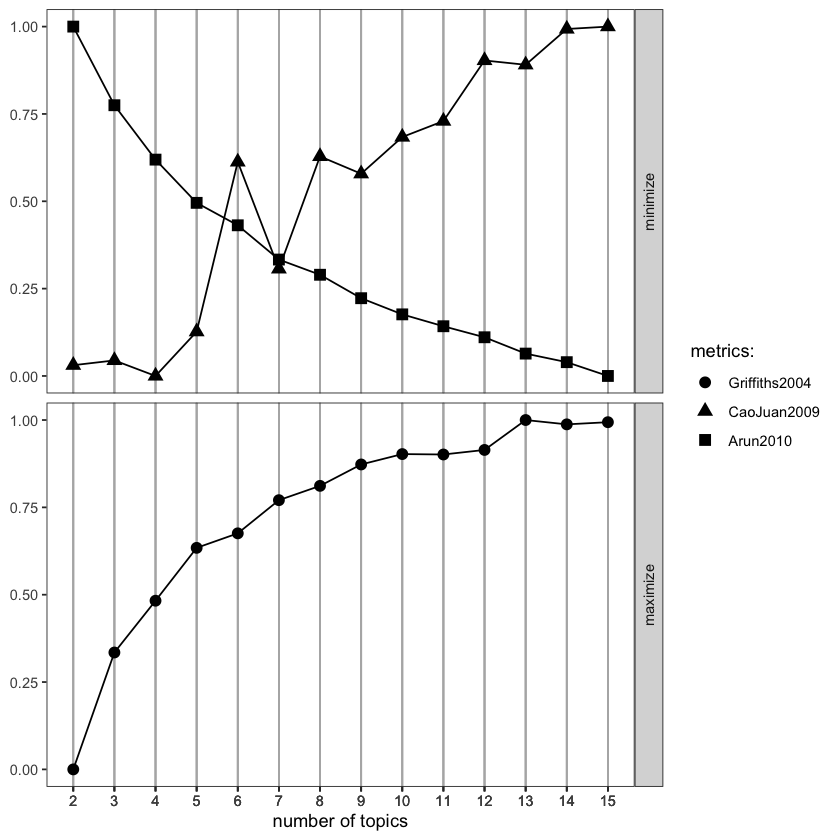

In [7]:
# positive activities

text = activity %>% filter(Estimate > 0) %>% pull(act)
text <- tokens(text) %>% tokens_wordstem

dfm = dfm(text, remove_numbers = T, remove_punct = T, remove_symbols = T, remove = stopwords("english"))
tunes <- FindTopicsNumber(
    dtm = dfm,
    topics = c(2:15),
    metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010"),
    method = "Gibbs",
    control = list(seed = 12345),
    mc.cores = 4L,
    verbose = TRUE
  )
FindTopicsNumber_plot(tunes)

In [8]:
n_topics = 2
model = LDA(convert(dfm, to = "topicmodels"), n_topics, control = list(seed = 101))
as.data.frame(terms(model, 10)) %>% stargazer(type='text', summary=F)


    Topic 1  Topic 2
--------------------
1    play     play  
2    danc     make  
3    make     clean 
4    clean    climb 
5     use      ice  
6    back     blow  
7  basketbal   car  
8    fold      eat  
9     eat     floor 
10   push     head  
--------------------


fit models... done.
calculate metrics:
  Griffiths2004... done.
  CaoJuan2009... done.
  Arun2010... done.


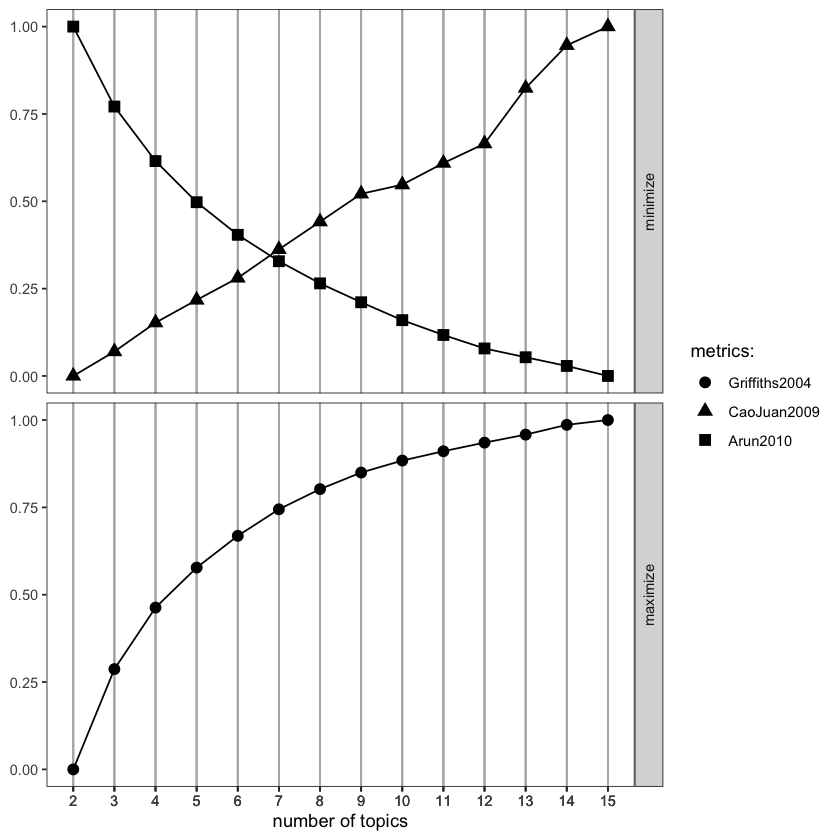

In [9]:
# negative activities

text = activity %>% filter(Estimate < 0) %>% pull(act)
text <- tokens(text) %>% tokens_wordstem

dfm = dfm(text, remove_numbers = T, remove_punct = T, remove_symbols = T, remove = stopwords("english"))
tunes <- FindTopicsNumber(
    dtm = dfm,
    topics = c(2:15),
    metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010"),
    method = "Gibbs",
    control = list(seed = 12345),
    mc.cores = 4L,
    verbose = TRUE
  )
FindTopicsNumber_plot(tunes)

In [10]:
n_topics = 2
model = LDA(convert(dfm, to = "topicmodels"), n_topics, control = list(seed = 101))
as.data.frame(terms(model, 10)) %>% stargazer(type='text', summary=F)


   Topic 1  Topic 2
-------------------
1    swim    appli 
2   paper    paper 
3  question  fill  
4    tabl    swim  
5    fli      run  
6    feed   stretch
7    die      leg  
8   basket    wax  
9  monopoli facepl 
10  bottl    book  
-------------------
